In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yahoo_fin import stock_info as si

# Ï¢ÖÎ™© ÏΩîÎìú ÏÑ§Ï†ï
tickers = {
    'ÏÇºÏÑ±Ï†ÑÏûê': '005930.KS',
    'ÎÑ§Ïù¥Î≤Ñ': '035420.KS',
    'Ïπ¥Ïπ¥Ïò§': '035720.KS'
}

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
data = {}
for company, ticker in tickers.items():
    data[company] = si.get_data(ticker, start_date='2022-01-01', end_date='2025-01-01')

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
# Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú Î∞è Í≤∞Ìï©
close_prices = pd.DataFrame()

for company, df in data.items():
    close_prices[company] = df['close']

# ÎÇ†Ïßú Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
close_prices.index = data['ÏÇºÏÑ±Ï†ÑÏûê'].index

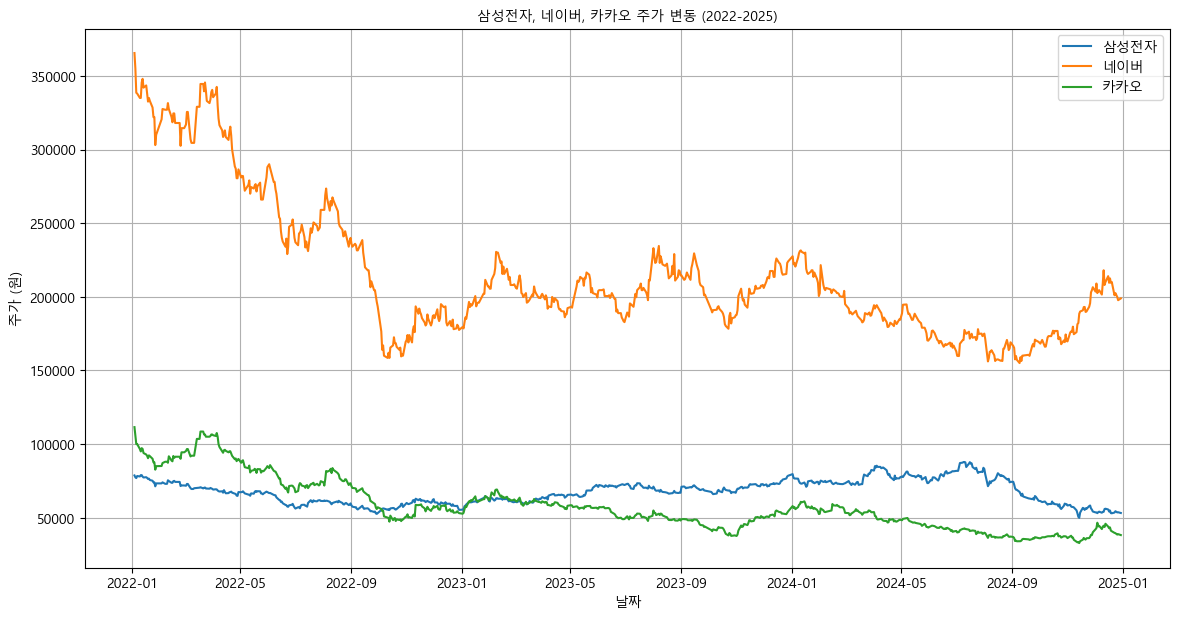

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (Windows)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú

font_prop = fm.FontProperties(fname=font_path)

# Matplotlib Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = font_prop.get_name()

# ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(14, 7))
for company in close_prices.columns:
    plt.plot(close_prices.index, close_prices[company], label=company)

plt.title('ÏÇºÏÑ±Ï†ÑÏûê, ÎÑ§Ïù¥Î≤Ñ, Ïπ¥Ïπ¥Ïò§ Ï£ºÍ∞Ä Î≥ÄÎèô (2022-2025)', fontproperties=font_prop)
plt.xlabel('ÎÇ†Ïßú', fontproperties=font_prop)
plt.ylabel('Ï£ºÍ∞Ä (Ïõê)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

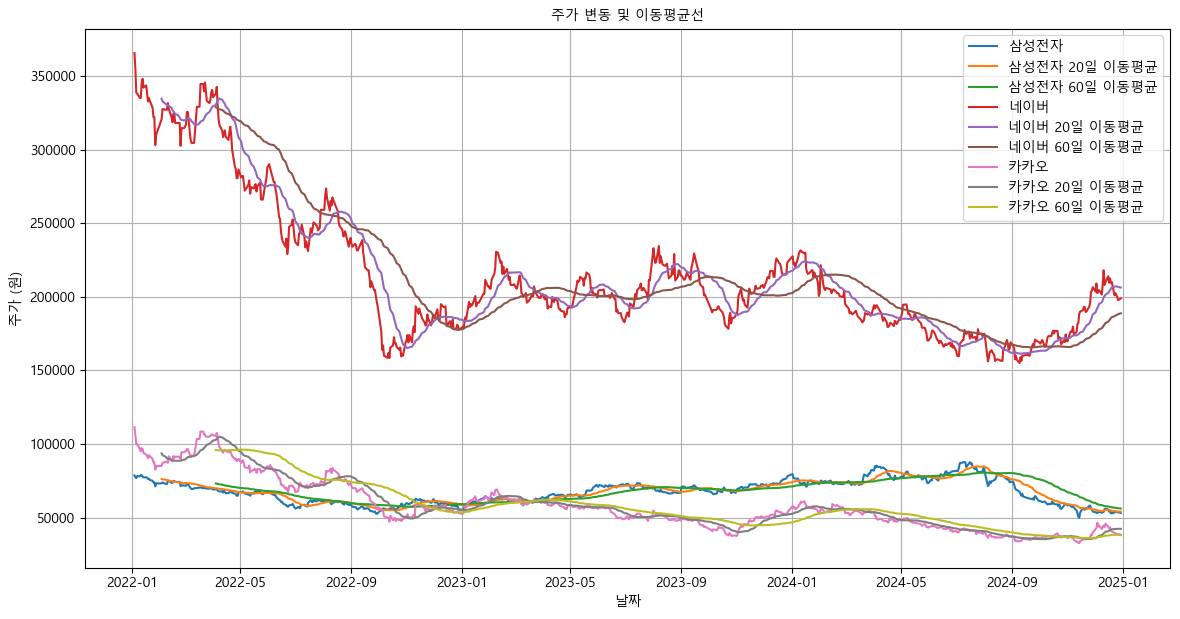

In [4]:
# Ïù¥Îèô ÌèâÍ∑†ÏÑ† Í≥ÑÏÇ∞
ma_days = [20, 60]
for ma in ma_days:
    for company in close_prices.columns:
        column_name = f'{company} {ma}Ïùº Ïù¥ÎèôÌèâÍ∑†'
        close_prices[column_name] = close_prices[company].rolling(window=ma).mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 7))
for company in close_prices.columns[:3]:
    plt.plot(close_prices.index, close_prices[company], label=company)
    for ma in ma_days:
        plt.plot(close_prices.index, close_prices[f'{company} {ma}Ïùº Ïù¥ÎèôÌèâÍ∑†'],
                 label=f'{company} {ma}Ïùº Ïù¥ÎèôÌèâÍ∑†')

plt.title('Ï£ºÍ∞Ä Î≥ÄÎèô Î∞è Ïù¥ÎèôÌèâÍ∑†ÏÑ†', fontproperties=font_prop)
plt.xlabel('ÎÇ†Ïßú', fontproperties=font_prop)
plt.ylabel('Ï£ºÍ∞Ä (Ïõê)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

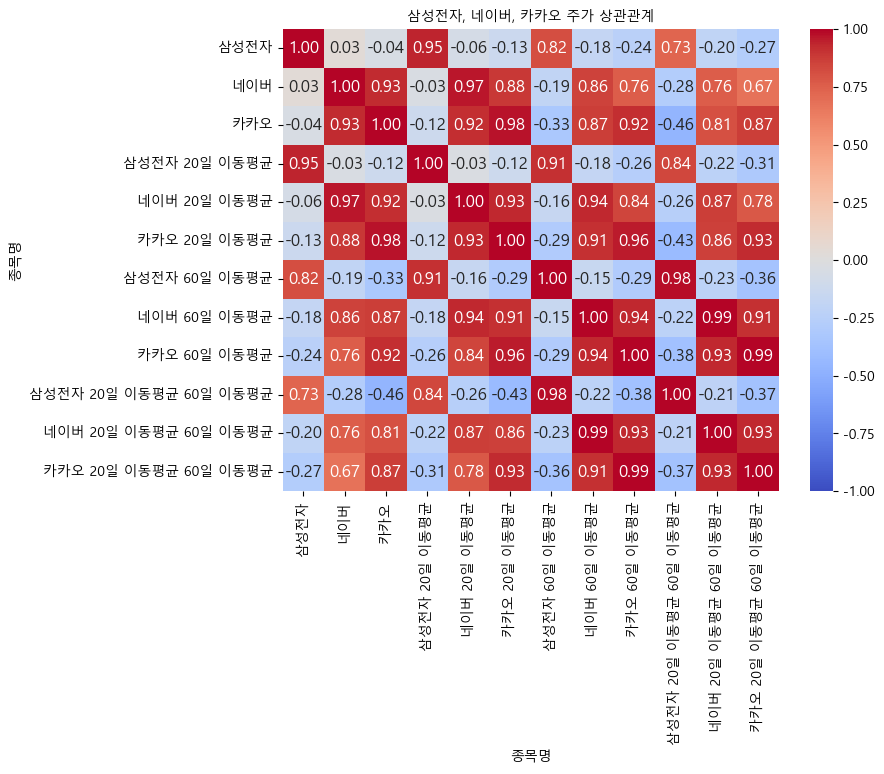

In [5]:
# üìå Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr = close_prices.corr()

# üìå ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî (ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö©)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"fontsize": 12, "fontproperties": font_prop}, fmt=".2f")

# üìå Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÌïúÍ∏Ä Ï†ÅÏö©
plt.title("ÏÇºÏÑ±Ï†ÑÏûê, ÎÑ§Ïù¥Î≤Ñ, Ïπ¥Ïπ¥Ïò§ Ï£ºÍ∞Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontproperties=font_prop)
plt.xlabel("Ï¢ÖÎ™©Î™Ö", fontproperties=font_prop)
plt.ylabel("Ï¢ÖÎ™©Î™Ö", fontproperties=font_prop)

plt.show()